<a href="https://colab.research.google.com/github/Ulianaaak/1.course/blob/main/homework.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [115]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels import robust

1. Как вы крастко охарактеризуете датасет, про что он?



In [279]:
dataset_filename = "/content/Google-Playstore.csv"
data_frame = pd.read_csv(dataset_filename)
data_frame

,App Name,App Id,Category,Rating,Rating Count,Installs,Minimum Installs,Maximum Installs,Free,Price,...,Developer Website,Developer Email,Released,Last Updated,Content Rating,Privacy Policy,Ad Supported,In App Purchases,Editors Choice,Scraped Time
0,Gakondo,com.ishakwe.gakondo,Adventure,0.0,0.0,10+,10.0,15,True,0.0,...,https://beniyizibyose.tk/#/,jean21101999@gmail.com,"Feb 26, 2020","Feb 26, 2020",Everyone,https://beniyizibyose.tk/projects/,False,False,False,2021-06-15 20:19:35
1,Ampere Battery Info,com.webserveis.batteryinfo,Tools,4.4,64.0,"5,000+",5000.0,7662,True,0.0,...,https://webserveis.netlify.app/,webserveis@gmail.com,"May 21, 2020","May 06, 2021",Everyone,https://dev4phones.wordpress.com/licencia-de-uso/,True,False,False,2021-06-15 20:19:35
2,Vibook,com.doantiepvien.crm,Productivity,0.0,0.0,50+,50.0,58,True,0.0,...,NaN,vnacrewit@gmail.com,"Aug 9, 2019","Aug 19, 2019",Everyone,https://www.vietnamairlines.com/vn/en/terms-an...,False,False,False,2021-06-15 20:19:35
3,Smart City Trichy Public Service Vehicles 17UC...,cst.stJoseph.ug17ucs548,Communication,5.0,5.0,10+,10.0,19,True,0.0,...,http://www.climatesmarttech.com/,climatesmarttech2@gmail.com,"Sep 10, 2018","Oct 13, 2018",Everyone,NaN,True,False,False,2021-06-15 20:19:35
4,GROW.me,com.horodyski.grower,Tools,0.0,0.0,100+,100.0,478,True,0.0,...,http://www.horodyski.com.pl,rmilekhorodyski@gmail.com,"Feb 21, 2020","Nov 12, 2018",Everyone,http://www.horodyski.com.pl,False,False,False,2021-06-15 20:19:35
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2312939,大俠客—熱血歸來,com.rxsj.ssjj,Role Playing,4.3,16775.0,"100,000+",100000.0,337109,True,0.0,...,http://www.4399sy.com.hk/,ssjjcomhk@gmail.com,NaN,"Jun 01, 2021",Teen,http://a.4399sy.com.hk/user/aggreement,False,False,False,2021-06-16 12:59:18
2312940,ORU Online,com.threedream.oruonline,Education,0.0,0.0,100+,100.0,430,True,0.0,...,http://www.oru.edu/,3DreamDeveloper@gmail.com,"Jan 17, 2018","Feb 02, 2018",Everyone,http://www.oru.edu/about-oru/privacy-policy.php,False,False,False,2021-06-16 12:59:19
2312941,Data Structure,datastructure.appoworld.datastucture,Education,0.0,0.0,100+,100.0,202,True,0.0,...,NaN,appoworld.official@gmail.com,"Aug 19, 2018","Aug 19, 2018",Everyone,https://appoworld.000webhostapp.com/datastruct...,False,False,False,2021-06-16 12:59:19
2312942,Devi Suktam,ishan.devi.suktam,Music & Audio,3.5,8.0,"1,000+",1000.0,2635,True,0.0,...,https://a70f78905.app-ads-txt.com,ruchisono@gmail.com,"Aug 1, 2016","May 05, 2021",Everyone,https://docs.google.com/document/d/1x-9reZuLRX...,True,False,False,2021-06-16 12:59:19


In [280]:
data_frame.isna().sum()
data_frame.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2312944 entries, 0 to 2312943
Data columns (total 24 columns):
 #   Column             Dtype  
---  ------             -----  
 0   App Name           object 
 1   App Id             object 
 2   Category           object 
 3   Rating             float64
 4   Rating Count       float64
 5   Installs           object 
 6   Minimum Installs   float64
 7   Maximum Installs   int64  
 8   Free               bool   
 9   Price              float64
 10  Currency           object 
 11  Size               object 
 12  Minimum Android    object 
 13  Developer Id       object 
 14  Developer Website  object 
 15  Developer Email    object 
 16  Released           object 
 17  Last Updated       object 
 18  Content Rating     object 
 19  Privacy Policy     object 
 20  Ad Supported       bool   
 21  In App Purchases   bool   
 22  Editors Choice     bool   
 23  Scraped Time       object 
dtypes: bool(4), float64(4), int64(1), object(15)
memor

Перед нами датасет из 2_312_944 строк.

Он представляет собой набор данных приложений Google PlayStore для Android


In [281]:
data_frame.drop(columns=["App Id", "Size", "Developer Id", "Developer Website", "Developer Email", "Released", "Last Updated"], inplace= True)
data_frame

,App Name,Category,Rating,Rating Count,Installs,Minimum Installs,Maximum Installs,Free,Price,Currency,Minimum Android,Content Rating,Privacy Policy,Ad Supported,In App Purchases,Editors Choice,Scraped Time
0,Gakondo,Adventure,0.0,0.0,10+,10.0,15,True,0.0,USD,7.1 and up,Everyone,https://beniyizibyose.tk/projects/,False,False,False,2021-06-15 20:19:35
1,Ampere Battery Info,Tools,4.4,64.0,"5,000+",5000.0,7662,True,0.0,USD,5.0 and up,Everyone,https://dev4phones.wordpress.com/licencia-de-uso/,True,False,False,2021-06-15 20:19:35
2,Vibook,Productivity,0.0,0.0,50+,50.0,58,True,0.0,USD,4.0.3 and up,Everyone,https://www.vietnamairlines.com/vn/en/terms-an...,False,False,False,2021-06-15 20:19:35
3,Smart City Trichy Public Service Vehicles 17UC...,Communication,5.0,5.0,10+,10.0,19,True,0.0,USD,4.0.3 and up,Everyone,NaN,True,False,False,2021-06-15 20:19:35
4,GROW.me,Tools,0.0,0.0,100+,100.0,478,True,0.0,USD,4.1 and up,Everyone,http://www.horodyski.com.pl,False,False,False,2021-06-15 20:19:35
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2312939,大俠客—熱血歸來,Role Playing,4.3,16775.0,"100,000+",100000.0,337109,True,0.0,USD,4.1 and up,Teen,http://a.4399sy.com.hk/user/aggreement,False,False,False,2021-06-16 12:59:18
2312940,ORU Online,Education,0.0,0.0,100+,100.0,430,True,0.0,USD,4.1 and up,Everyone,http://www.oru.edu/about-oru/privacy-policy.php,False,False,False,2021-06-16 12:59:19
2312941,Data Structure,Education,0.0,0.0,100+,100.0,202,True,0.0,USD,5.0 and up,Everyone,https://appoworld.000webhostapp.com/datastruct...,False,False,False,2021-06-16 12:59:19
2312942,Devi Suktam,Music & Audio,3.5,8.0,"1,000+",1000.0,2635,True,0.0,USD,5.0 and up,Everyone,https://docs.google.com/document/d/1x-9reZuLRX...,True,False,False,2021-06-16 12:59:19


Убрали большинство столбцов, которые в дальнейшем не будут использоваться.
Отфильтровав исходный набор данных, получили 238.2+ MB вместо 361.8+ MB, что увеличит скорость обработки датафрейма.

In [100]:
data_frame.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2312944 entries, 0 to 2312943
Data columns (total 17 columns):
 #   Column            Dtype  
---  ------            -----  
 0   App Name          object 
 1   Category          object 
 2   Rating            float64
 3   Rating Count      float64
 4   Installs          object 
 5   Minimum Installs  float64
 6   Maximum Installs  int64  
 7   Free              bool   
 8   Price             float64
 9   Currency          object 
 10  Minimum Android   object 
 11  Content Rating    object 
 12  Privacy Policy    object 
 13  Ad Supported      bool   
 14  In App Purchases  bool   
 15  Editors Choice    bool   
 16  Scraped Time      object 
dtypes: bool(4), float64(4), int64(1), object(8)
memory usage: 238.2+ MB


2. Сколько в среднем скачиваний у приложений в выборке?

In [282]:
data_frame['Installs'] = data_frame['Installs'].str.replace('+', '').str.replace(',','').dropna().astype(int)
data_frame

<ipython-input-282-4bdd5b7833aa>:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  data_frame['Installs'] = data_frame['Installs'].str.replace('+', '').str.replace(',','').dropna().astype(int)


,App Name,Category,Rating,Rating Count,Installs,Minimum Installs,Maximum Installs,Free,Price,Currency,Minimum Android,Content Rating,Privacy Policy,Ad Supported,In App Purchases,Editors Choice,Scraped Time
0,Gakondo,Adventure,0.0,0.0,10.0,10.0,15,True,0.0,USD,7.1 and up,Everyone,https://beniyizibyose.tk/projects/,False,False,False,2021-06-15 20:19:35
1,Ampere Battery Info,Tools,4.4,64.0,5000.0,5000.0,7662,True,0.0,USD,5.0 and up,Everyone,https://dev4phones.wordpress.com/licencia-de-uso/,True,False,False,2021-06-15 20:19:35
2,Vibook,Productivity,0.0,0.0,50.0,50.0,58,True,0.0,USD,4.0.3 and up,Everyone,https://www.vietnamairlines.com/vn/en/terms-an...,False,False,False,2021-06-15 20:19:35
3,Smart City Trichy Public Service Vehicles 17UC...,Communication,5.0,5.0,10.0,10.0,19,True,0.0,USD,4.0.3 and up,Everyone,NaN,True,False,False,2021-06-15 20:19:35
4,GROW.me,Tools,0.0,0.0,100.0,100.0,478,True,0.0,USD,4.1 and up,Everyone,http://www.horodyski.com.pl,False,False,False,2021-06-15 20:19:35
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2312939,大俠客—熱血歸來,Role Playing,4.3,16775.0,100000.0,100000.0,337109,True,0.0,USD,4.1 and up,Teen,http://a.4399sy.com.hk/user/aggreement,False,False,False,2021-06-16 12:59:18
2312940,ORU Online,Education,0.0,0.0,100.0,100.0,430,True,0.0,USD,4.1 and up,Everyone,http://www.oru.edu/about-oru/privacy-policy.php,False,False,False,2021-06-16 12:59:19
2312941,Data Structure,Education,0.0,0.0,100.0,100.0,202,True,0.0,USD,5.0 and up,Everyone,https://appoworld.000webhostapp.com/datastruct...,False,False,False,2021-06-16 12:59:19
2312942,Devi Suktam,Music & Audio,3.5,8.0,1000.0,1000.0,2635,True,0.0,USD,5.0 and up,Everyone,https://docs.google.com/document/d/1x-9reZuLRX...,True,False,False,2021-06-16 12:59:19


# #Installs = Minimum Installs

In [130]:
data_frame.describe()['Installs']

count    2.906400e+04
mean     1.222746e+04
std      1.321481e+05
min      0.000000e+00
25%      1.000000e+01
50%      1.000000e+02
75%      1.000000e+03
max      1.000000e+07
Name: Installs, dtype: float64

In [90]:
data_frame['Installs'].mean()

183445.21395800915

In [94]:
downloads = ['Minimum Installs','Maximum Installs']
data_frame[downloads].mean()

Minimum Installs    183445.213958
Maximum Installs    320201.713137
dtype: float64

In [96]:
data_frame['Installs'].median(axis=0, skipna=True, numeric_only=True)

500.0

In [136]:
data_frame[downloads + ['Installs']+ ['Category']].mode(numeric_only=False, axis=0).dropna()

,Minimum Installs,Maximum Installs,Installs,Category
0,100.0,0,100.0,Education


In [137]:
from scipy.stats import trim_mean
trim_mean(data_frame['Installs'], 0.15)

721.7256463186867

* Среднее количество скачиваний 183_445 раз.
* Среднее минимальное = 183_445, среднее максимальное = 320_201
* Медианной количества скачиваний является 500.
* Самым часто встречаемым количеством скачиваний является 100
* Если отбросить крайние значения с обеих сторон на 15% то средним количеством скачиваний является 721 раз


3. Сколько в среднем стоит приложение в выборке?

In [129]:
data_frame = data_frame.query("Price != 0").dropna()
data_frame['Price'].mean()

6.029345225777595

Если рассматривать только платные приложения, то их средняя цена состовляет 6.03 USD
(другие валюты фигурируют у бесплатных приложений)

4. Как распределены данные по скачиваниям?

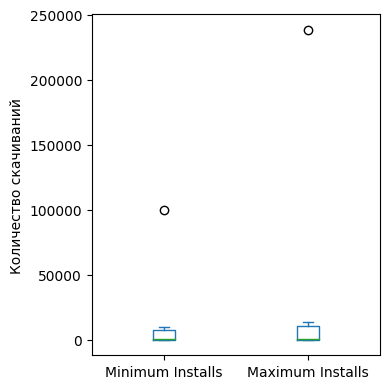

In [183]:
percentages = [0.05, 0.1, 0.25, 0.5, 0.75, 0.8, 0.95]
ax = (data_frame[downloads].quantile(percentages) ).plot.box(figsize=(4, 4))
ax.set_ylabel('Количество скачиваний')

plt.tight_layout()
plt.show()

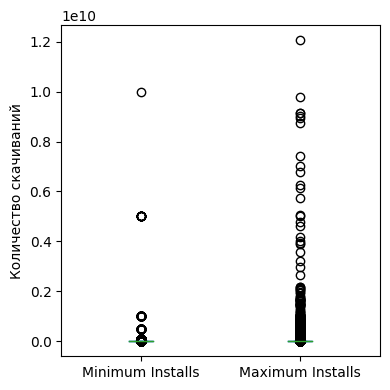

In [184]:
ax = (data_frame[downloads]).plot.box(figsize=(4, 4))
ax.set_ylabel('Количество скачиваний')

plt.tight_layout()
plt.show()

Можно сделать вывод, что данные по скачиванию стремятся к минимальному своему значению (0)

5. Приложения каких категорий скачивают чаще всего?

In [202]:
category_installs = data_frame.groupby('Category')['Installs'].sum()
top_10_categories = category_installs.sort_values(ascending=False).head(10)
top_10_categories

Category
Tools                      7.144047e+10
Communication              4.321659e+10
Productivity               2.831405e+10
Photography                1.899896e+10
Video Players & Editors    1.859115e+10
Action                     1.740038e+10
Social                     1.716600e+10
Entertainment              1.710851e+10
Casual                     1.683707e+10
Arcade                     1.450133e+10
Name: Installs, dtype: float64

Приложения категорий Tools, Communication, Productivity, Photography, Video Players & Editors являются самыми скачиваемыми.

6.Как распределены данные по рейтингу приложений?

Text(0.5, 0, 'Рейтинг')

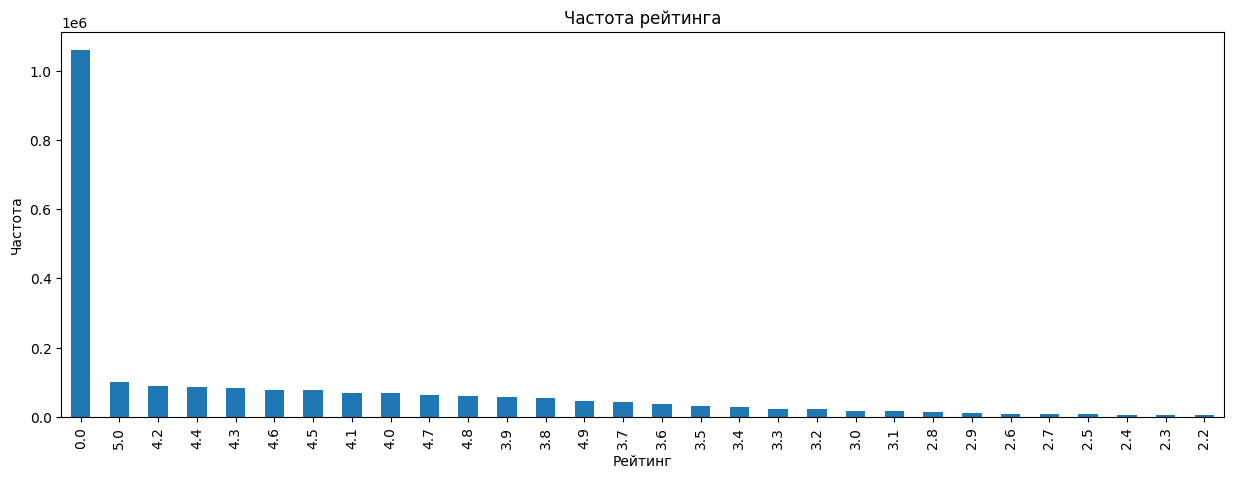

In [214]:
data_frame['Rating'].value_counts().nlargest(30).plot(kind='bar', figsize=(15,5))
plt.title("Частота рейтинга")
plt.ylabel('Частота')
plt.xlabel('Рейтинг')

Гистограмма позволяет наглядно посмотреть как распределены данные по рейтингу приложений

7.Как бы вы охарактеризовали самое часто встречающееся значение в наборе данных, какое это приложение?

Text(0.5, 0, 'Категории')

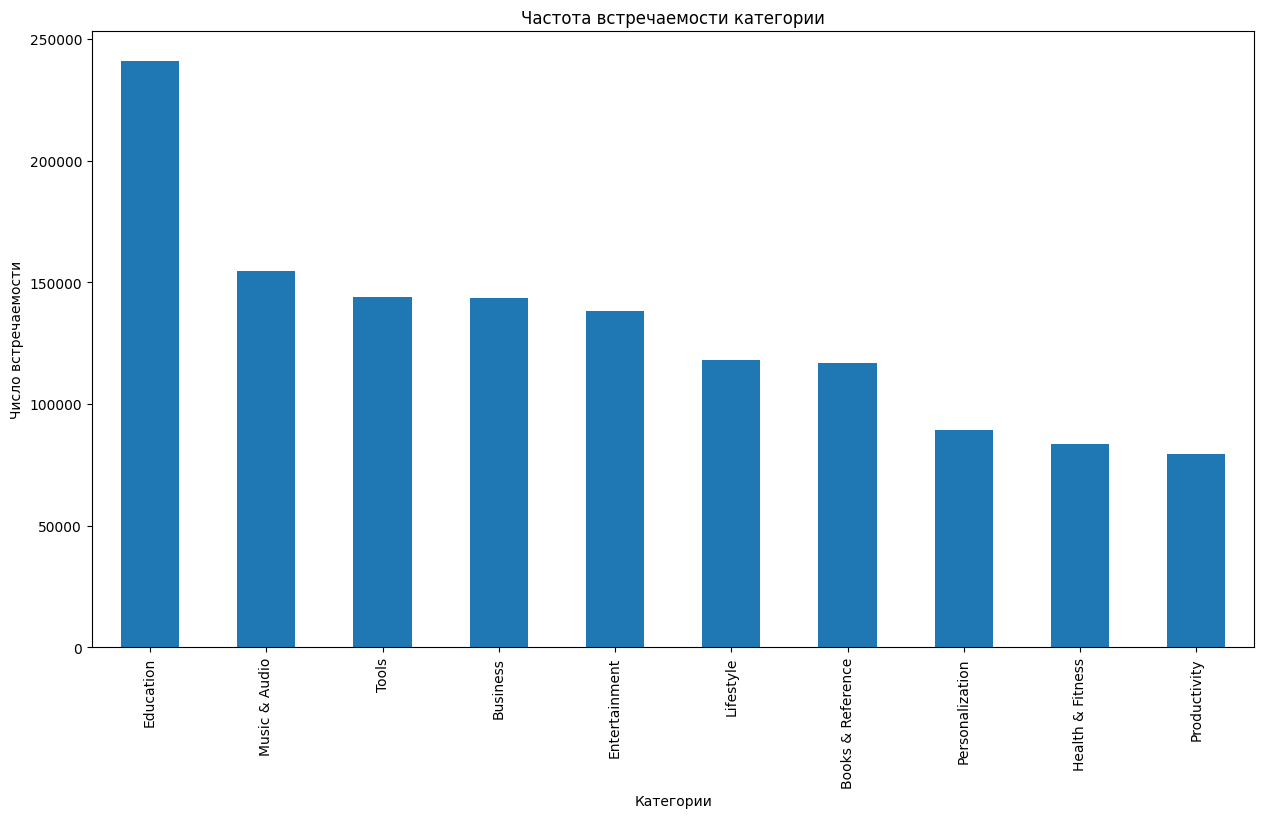

In [224]:
data_frame["Category"].value_counts().nlargest(10).plot(kind='bar', figsize=(15,8))
plt.title("Частота встречаемости категории")
plt.ylabel('Число встречаемости')
plt.xlabel('Категории')

Гистограмма показала, что самое часто встречающееся значение в наборе данных, а именно в категориях - это Education.

8. Есть ли зависимость категории приложения от рейтинга приложения?

In [261]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
data_frame['Category_Encoded'] = label_encoder.fit_transform(data_frame['Category'])

correlation = data_frame['Category_Encoded'].corr(data_frame['Rating'])

print("Корреляция между категорией и рейтингом приложения:", correlation)

Корреляция между категорией и рейтингом приложения: -0.7171371656006366


Отрицательная корреляция между ними означает, что категории приложений с более высокими значениями "Category_Encoded"  обычно имеют более низкие значения рейтинга "Rating", и наоборот. То есть, чем выше категория приложения, тем ниже обычно рейтинг этого приложения.

9. Как распределены оценки (рейтинги) приложений?


Text(0.5, 0, 'Оценка')

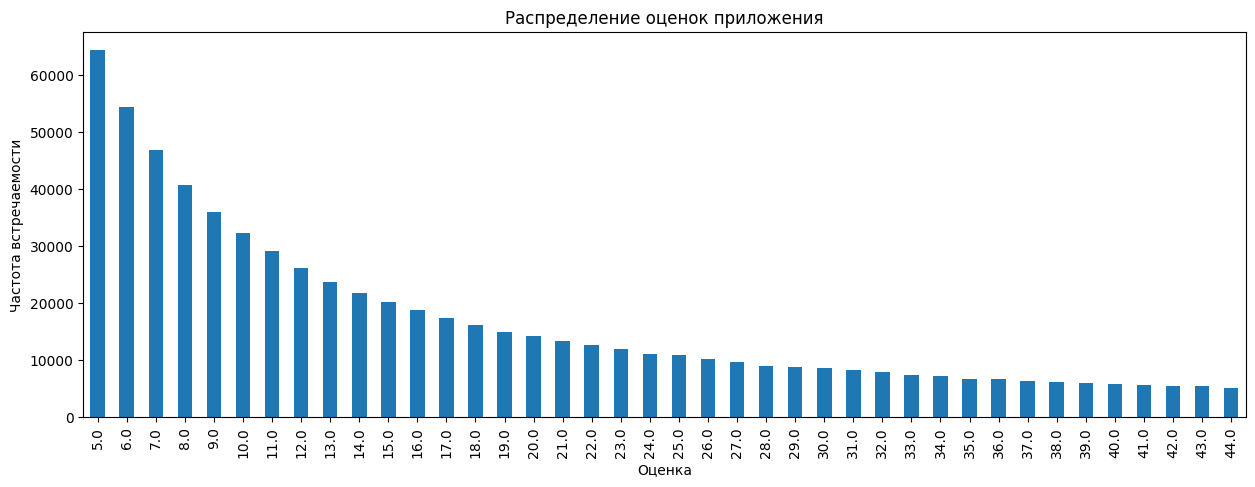

In [288]:
data_frame = data_frame[data_frame["Rating Count"] != 0]
data_frame["Rating Count"].value_counts().nlargest(40).plot(kind='bar', figsize=(15,5))
plt.title("Распределение оценок приложения")
plt.ylabel('Частота встречаемости')
plt.xlabel('Оценка')

Отфильтровала рейтинг ( != 0)для наглядности.

10. Как кореллируют между собой рейтинг и количество скачиваний приложения?


In [289]:
data_frame['Rating']. corr(data_frame['Installs'])

0.0011794146488370385

Положительная корреляция между рейтингом и количеством скачивания приложения означает, что с увеличением рейтинга приложения обычно увеличивается и количество скачиваний, и наоборот. То есть, если пользователи оценивают приложение высоким рейтингом, скорее всего, они также склонны скачивать его чаще.